# Objectif : Chercher la composition optimale d'un portefeuille action


In [1]:
import yfinance as yf 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
plt.style.use('fivethirtyeight')

In [2]:
# select the tickers 
tickers = ['IBM','GOOG','AMZN']

In [3]:
# la periode
end_date = datetime.now()
start_date = end_date - timedelta(days=2*365)
end_date
start_date

datetime.datetime(2021, 11, 20, 14, 59, 52, 592400)

In [4]:
# create a dataframe to store close prices 
close_df = pd.DataFrame()
close_df

""


In [5]:
for ticker in tickers:
     print(ticker)
     data = yf.download(ticker,start=start_date,end=end_date)
     close_df[ticker]=data['Close']

IBM
[*********************100%%**********************]  1 of 1 completed
GOOG
[*********************100%%**********************]  1 of 1 completed
AMZN
[*********************100%%**********************]  1 of 1 completed


In [6]:
#les prix de cloture
close_df.head()

,IBM,GOOG,AMZN
Date,,,
2021-11-22,116.470001,147.078506,178.628494
2021-11-23,116.790001,146.757004,179.001999
2021-11-24,116.730003,146.717499,179.020493
2021-11-26,115.809998,142.806000,175.227997
2021-11-29,118.500000,146.113998,178.078506


In [7]:
#calculer les rendement 
returns = close_df.pct_change()
returns.head()

,IBM,GOOG,AMZN
Date,,,
2021-11-22,NaN,NaN,NaN
2021-11-23,0.002747,-0.002186,0.002091
2021-11-24,-0.000514,-0.000269,0.000103
2021-11-26,-0.007881,-0.026660,-0.021185
2021-11-29,0.023228,0.023164,0.016267


In [8]:
#rendement moyen
mean_returns = returns.mean()
mean_returns

IBM     0.000630
GOOG    0.000100
AMZN   -0.000054
dtype: float64

In [9]:
#variannce
var_returns = returns.var()
var_returns

IBM     0.000171
GOOG    0.000485
AMZN    0.000724
dtype: float64

In [10]:
cov_matrix = returns.cov()
cov_matrix

,IBM,GOOG,AMZN
IBM,0.000171,0.000086,0.000091
GOOG,0.000086,0.000485,0.000409
AMZN,0.000091,0.000409,0.000724


In [11]:
title = 'stocks Price History'

<AxesSubplot:title={'center':'stocks Price History'}, xlabel='Date'>

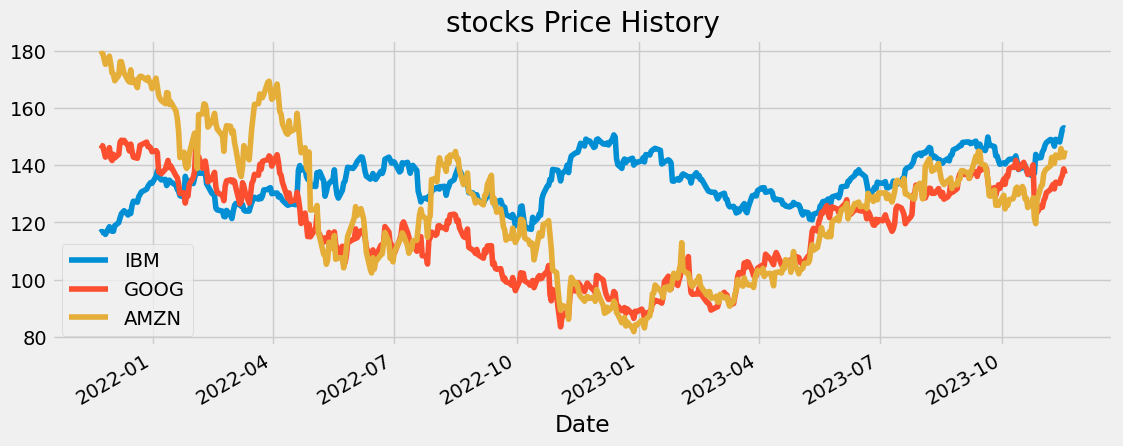

In [13]:
close_df.plot(title="stocks Price History",figsize=(12.2,4.5))

# Portfolio 

In [16]:
#consitier un portefeuille avec ces trois titres 
#les poids des titres
weights = np.array([0.4,0.3,0.3])
#rendement du portefeuille
portfolio_return = returns.dot(weights)
portfolio_return.head()





Date
2021-11-22         NaN
2021-11-23    0.001071
2021-11-24   -0.000255
2021-11-26   -0.017506
2021-11-29    0.021121
dtype: float64

In [17]:
portfolio_mean_returns = portfolio_return.mean()
portfolio_mean_returns


0.0002657330208743078

In [19]:
#rendement moyen des 3 titre * les poids sans utiliser returns
portfolio_mean_returns = (mean_returns['IBM']*weights[0])+(mean_returns['GOOG']*weights[1])+(mean_returns['AMZN']*weights[2])
portfolio_mean_returns

0.00026573302087430786

In [20]:
#variance porte feuille 
portfolio_var = portfolio_return.var()
portfolio_var

0.00025217247441467107

In [22]:
#matrice de covariance
portfolio_cov_matrix = returns.cov()
portfolio_cov_matrix

,IBM,GOOG,AMZN
IBM,0.000171,0.000086,0.000091
GOOG,0.000086,0.000485,0.000409
AMZN,0.000091,0.000409,0.000724


In [24]:
portfolio_var2= np.dot(weights.T,np.dot(portfolio_cov_matrix,weights))
portfolio_var2

0.000252172474414671

In [28]:
portlio_annuel_return = portfolio_mean_returns*252
portlio_annuel_return

0.06696472126032559

In [30]:
#ecart type
portfolio_std = np.sqrt(portfolio_var2)
portfolio_std

0.01587993937062327

In [36]:
#print le portfolio annuel la variance et l'ecart type en pourcentage

print('portfolio annual return :',round(portlio_annuel_return,4)*100,'%')
print('portfolio annual variance :',round(portfolio_var2,4)*100,'%')
print('portfolio annual standard deviation :',round(portfolio_std,4)*100,'%')




portfolio annual return : 6.7 %
portfolio annual variance : 0.03 %
portfolio annual standard deviation : 1.59 %


In [37]:
import pypfopt as pfo
from pypfopt import risk_models
from pypfopt import expected_returns


In [38]:
ef= pfo.EfficientFrontier(mean_returns,cov_matrix)
ef.min_volatility()


OrderedDict([('IBM', 0.8191664420759354),
             ('GOOG', 0.1561170573706486),
             ('AMZN', 0.024716500553416)])

In [40]:
ef.portfolio_performance(verbose=True)

Expected annual return: 0.1%
Annual volatility: 1.2%
Sharpe Ratio: -1.56


(0.0005301178526262393, 0.012494083467303478, -1.558328163752521)

## With cvxpy

In [41]:
import cvxpy as cp 


In [42]:
weights = cp.Variable(len(mean_returns))
weights

Variable((3,), var45)

In [43]:
objective = cp.Minimize(cp.quad_form(weights,cov_matrix))

In [44]:
contrainte = [weights>=0,cp.sum(weights)==1]

In [45]:
probleme = cp.Problem(objective,contrainte)

In [46]:
probleme.solve()

0.0001561021216879461

In [47]:
weights.value

array([0.81916644, 0.15611706, 0.0247165 ])